In [1]:
from os import listdir
from os.path import isfile, join
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
mypath = 'Datos_14oct_2' #path with files to analyze
files = [f for f in listdir(mypath) if isfile(join(mypath, f))] #get all file names of that path

In [2]:
def Error_Analysis_Time(file_name):
    plt.style.use('ggplot')
    #error analysis, where file_name is the name of the file to analyze
    #i dont include mypath as an arg bc it's a global variable
    file_dir = mypath + '/' + str(file_name)
    data = pd.read_csv(file_dir,sep=",",quotechar='"',parse_dates=["fecha"],na_values=[''])
    df = pd.DataFrame(data)
    #dates formatting
    first_day = min(df["fecha"])
    last_day = max(df["fecha"])
    df["fecha"] -= first_day
    df.fecha = df.fecha.dt.days
    df = df.to_numpy() #to numpy array (date,rho7d,inc14days,riskper10)
    #data analysis per se
    fig, (ax1, ax2,ax3) = plt.subplots(3)
    fig.suptitle(str(file_name)+' - Incidencia-Tiempo')
    ax1.plot(df[:,0],df[:,2],'-or',label='Casos')
    last = df.shape[0]
    df = np.hstack((df,np.zeros((last,1))))
    i = 19
    while i < last:
        df[i,4] = df[i-7,3]
        i = i+1
    ax1.plot(df[19:,0],df[19:,4],'b',linewidth=2,label='Prediccion')
    ax1.legend()
    ax2.set_xlabel('Tiempo (días)',fontsize=10)
    ax1.set_ylabel('Casos activos/100mil',fontsize=8)
    ax2.set_ylabel('Error',fontsize=10)
    error = df[19:,4]-df[19:,2]
    ax2.plot(df[19:,0],error)
    ax3.plot(df[:,0],df[:,1])
    ax3.set_ylabel(r'$R_7$')
    ax3.set_xlabel('Tiempo (días)',fontsize=10)
    plt.tight_layout()
    #plt.savefig(str(file_name)+'_Tiempo.pdf')

In [14]:
def Error_Analysis_R7(file_name):
    #error analysis, where file_name is the name of the file to analyze
    #i dont include mypath as an arg bc it's a global variable
    file_dir = mypath + '/' + str(file_name)
    data = pd.read_csv(file_dir,sep=",",quotechar='"',parse_dates=["fecha"],na_values=[''])
    df = pd.DataFrame(data)
    #dates formatting
    first_day = min(df["fecha"])
    last_day = max(df["fecha"])
    df["fecha"] -= first_day
    df.fecha = df.fecha.dt.days
    df = df.to_numpy() #to numpy array (date,rho7d,inc14days,riskper10)
    plt.figure()
    #data analysis per se
    plt.title(str(file_name)+' - Error-R7')
    last = df.shape[0]
    df = np.hstack((df,np.zeros((last,1))))
    i = 19
    while i < last:
        df[i,4] = df[i-7,3]
        i = i+1
    error = df[19:,4]-df[19:,2]
    plt.plot(df[19:,1],error,'-or')
    plt.plot(df[19,1],error[0],'sk')
    plt.plot(df[last-1,1],error[error.shape[0]-1],'sg')
    plt.xlabel(r'$R_7$')
    plt.ylabel('Error',fontsize=10)
    plt.savefig(str(file_name)+'_R7.pdf')

In [10]:
def Error_Analysis_R7_2(file_name):
    #error analysis, where file_name is the name of the file to analyze
    #i dont include mypath as an arg bc it's a global variable
    file_dir = mypath + '/' + str(file_name)
    data = pd.read_csv(file_dir,sep=",",quotechar='"',parse_dates=["fecha"],na_values=[''])
    df = pd.DataFrame(data)
    #dates formatting
    first_day = min(df["fecha"])
    last_day = max(df["fecha"])
    df["fecha"] -= first_day
    df.fecha = df.fecha.dt.days
    df = df.to_numpy() #to numpy array (date,rho7d,inc14days,riskper10)
    #plt.figure()
    #data analysis per se
    #plt.title(str(file_name)+' - Error-R7')
    last = df.shape[0]
    df = np.hstack((df,np.zeros((last,1))))
    i = 19
    while i < last:
        df[i,4] = df[i-7,3]
        i = i+1
    error = df[19:,4]-df[19:,2]
    plt.plot(df[19:,1],error,'-or')
    #plt.plot(df[19,1],error[0],'sk')
    #plt.plot(df[last-1,1],error[error.shape[0]-1],'sg')
    plt.xlabel(r'$R_7$')
    plt.ylabel('Error',fontsize=10)
    #plt.savefig(str(file_name)+'_R7.pdf')

In [5]:
def Error_Analysis_A14(file_name):
    #error analysis, where file_name is the name of the file to analyze
    #i dont include mypath as an arg bc it's a global variable
    file_dir = mypath + '/' + str(file_name)
    data = pd.read_csv(file_dir,sep=",",quotechar='"',parse_dates=["fecha"],na_values=[''])
    df = pd.DataFrame(data)
    #dates formatting
    first_day = min(df["fecha"])
    last_day = max(df["fecha"])
    df["fecha"] -= first_day
    df.fecha = df.fecha.dt.days
    df = df.to_numpy() #to numpy array (date,rho7d,inc14days,riskper10)
    #data analysis per se
    plt.figure()
    plt.title(str(file_name)+' - Error-A14')
    last = df.shape[0]
    df = np.hstack((df,np.zeros((last,1))))
    i = 19
    while i < last:
        df[i,4] = df[i-7,3]
        i = i+1
    error = df[19:,4]-df[19:,2]
    plt.plot(df[19:,2],error,'-ob')
    plt.plot(df[19,2],error[0],'sk')
    plt.plot(df[last-1,2],error[error.shape[0]-1],'sg')
    plt.xlabel(r'$A_{14}$')
    plt.ylabel('Error',fontsize=10)
    plt.savefig(str(file_name)+'_A14.pdf')

In [17]:
def Error_Analysis_A14_2(file_name):
    #error analysis, where file_name is the name of the file to analyze
    #i dont include mypath as an arg bc it's a global variable
    file_dir = mypath + '/' + str(file_name)
    data = pd.read_csv(file_dir,sep=",",quotechar='"',parse_dates=["fecha"],na_values=[''])
    df = pd.DataFrame(data)
    #dates formatting
    first_day = min(df["fecha"])
    last_day = max(df["fecha"])
    df["fecha"] -= first_day
    df.fecha = df.fecha.dt.days
    df = df.to_numpy() #to numpy array (date,rho7d,inc14days,riskper10)
    #data analysis per se
    #plt.figure()
    #plt.title(str(file_name)+' - Error-A14')
    last = df.shape[0]
    df = np.hstack((df,np.zeros((last,1))))
    i = 19
    while i < last:
        df[i,4] = df[i-7,3]
        i = i+1
    error = df[19:,4]-df[19:,2]
    plt.plot(df[19:,2],error,'-ob')
    #plt.plot(df[19,2],error[0],'sk')
    #plt.plot(df[last-1,2],error[error.shape[0]-1],'sg')
    plt.xlabel(r'$A_{14}$')
    plt.ylabel('Error',fontsize=10)
    #plt.savefig(str(file_name)+'_A14.pdf')

RiesgoAvellanedaNA
RiesgoBahíaBlanca
RiesgoBariloche
RiesgoBuenosAires
RiesgoCABACABANA
RiesgoCABACOMUNA8
RiesgoCórdobaCapital
RiesgoCórdobaCórdoba
RiesgoLaMatanza
RiesgoRioNegro
RiesgoSantaFeLaCapital
RiesgoSantaFeRosario
RiesgoSantaFeSantaFe


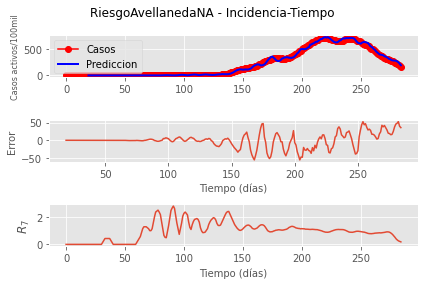

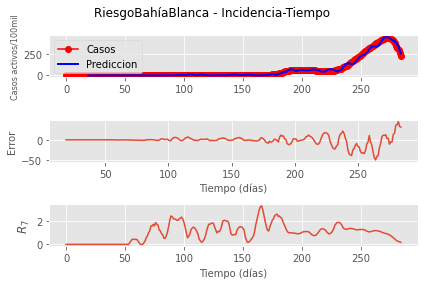

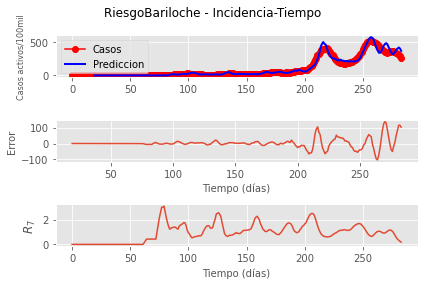

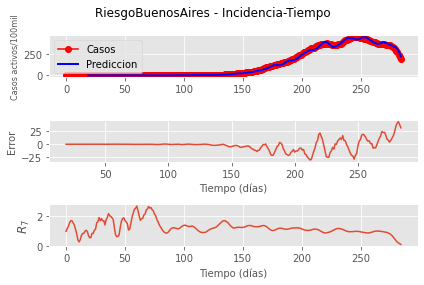

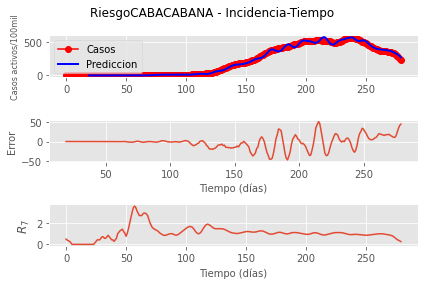

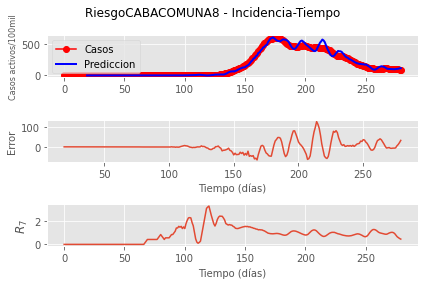

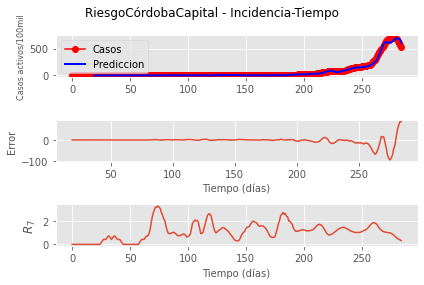

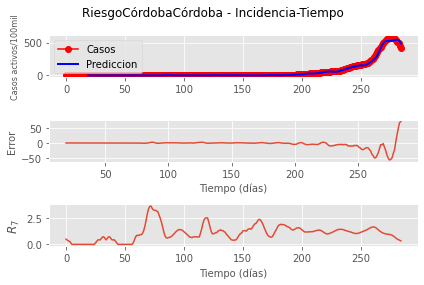

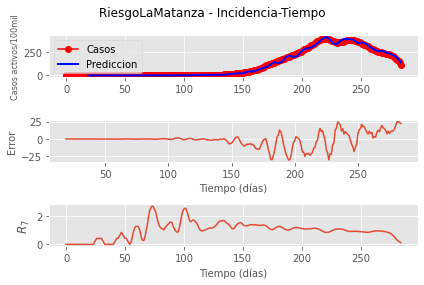

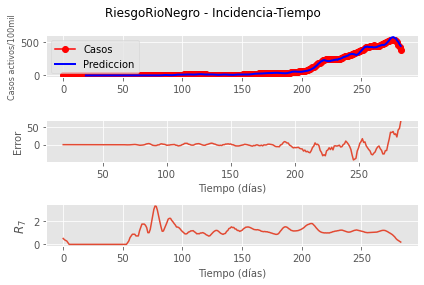

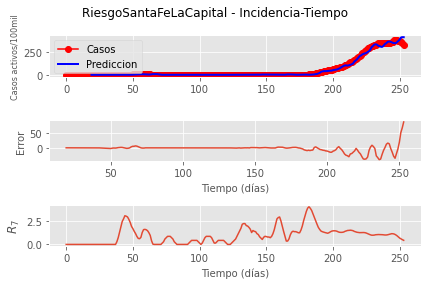

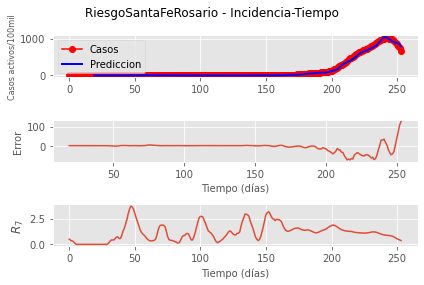

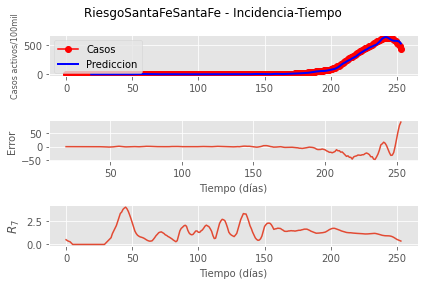

In [6]:
for file_name in files:
    print(file_name)
    Error_Analysis_Time(file_name)

RiesgoAvellanedaNA
RiesgoBahíaBlanca
RiesgoBariloche
RiesgoBuenosAires
RiesgoCABACABANA
RiesgoCABACOMUNA8
RiesgoCórdobaCapital
RiesgoCórdobaCórdoba
RiesgoLaMatanza
RiesgoRioNegro
RiesgoSantaFeLaCapital
RiesgoSantaFeRosario
RiesgoSantaFeSantaFe


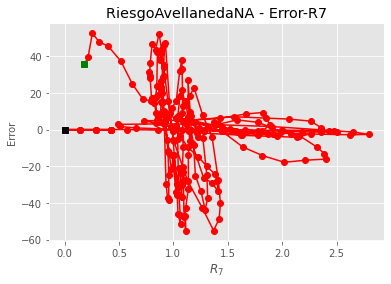

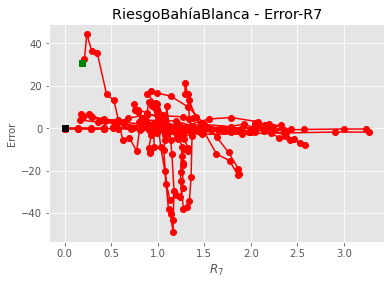

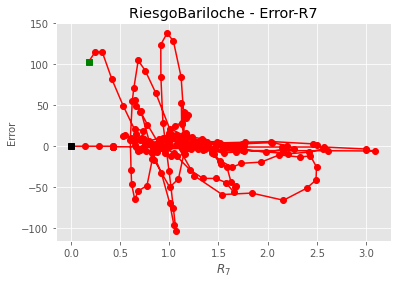

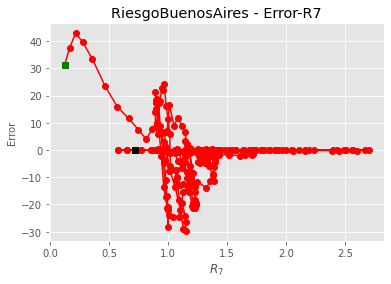

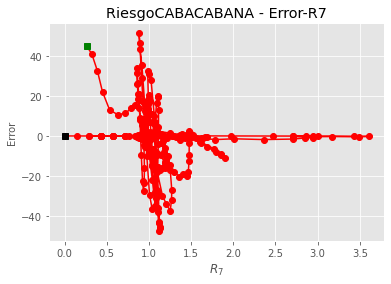

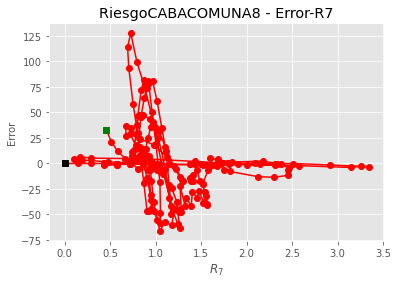

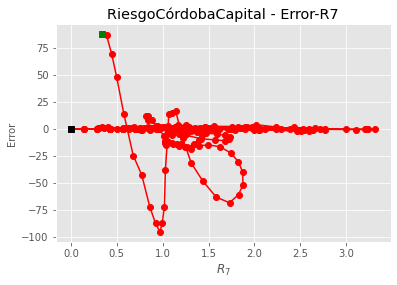

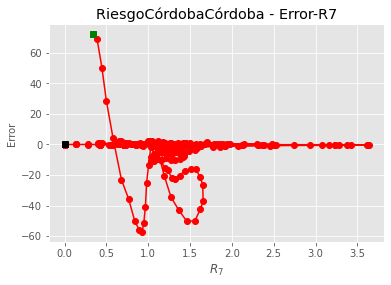

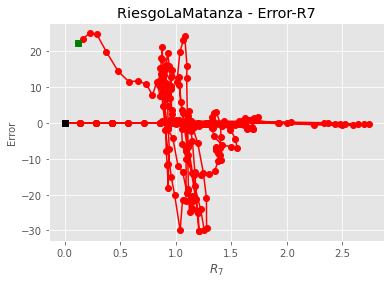

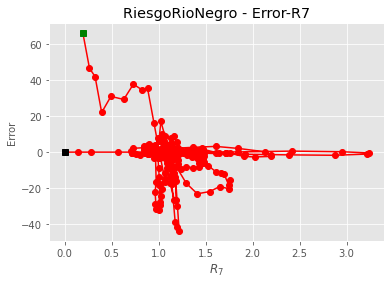

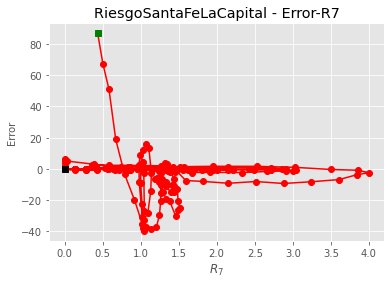

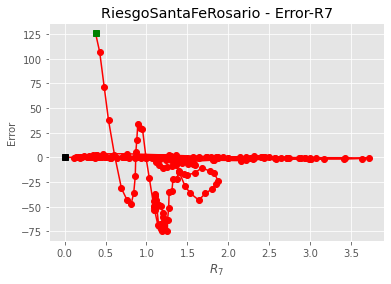

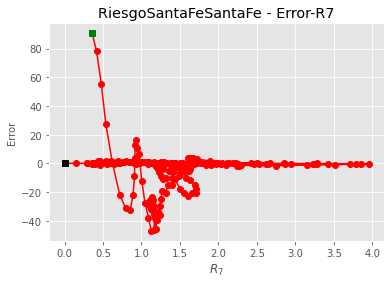

In [7]:
for file_name in files:
    print(file_name)
    Error_Analysis_R7(file_name)

RiesgoAvellanedaNA
RiesgoBahíaBlanca
RiesgoBariloche
RiesgoBuenosAires
RiesgoCABACABANA
RiesgoCABACOMUNA8
RiesgoCórdobaCapital
RiesgoCórdobaCórdoba
RiesgoLaMatanza
RiesgoRioNegro
RiesgoSantaFeLaCapital
RiesgoSantaFeRosario
RiesgoSantaFeSantaFe


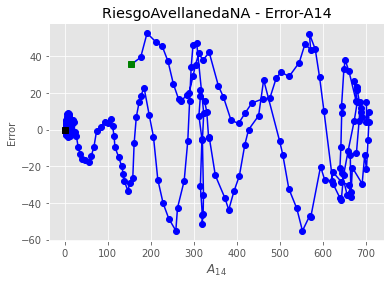

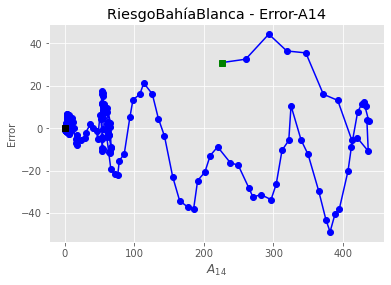

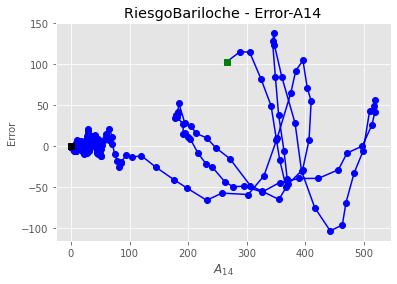

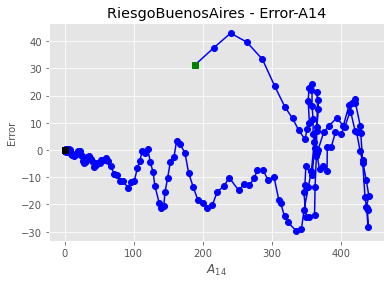

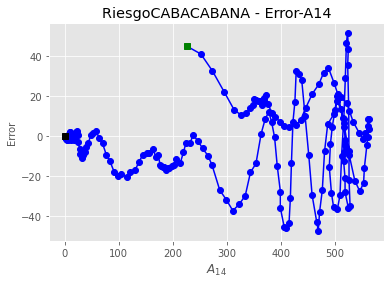

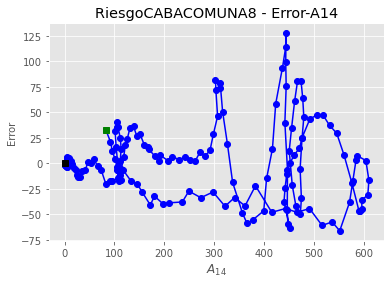

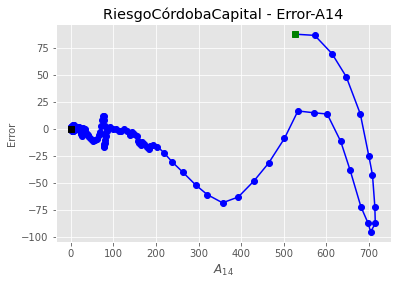

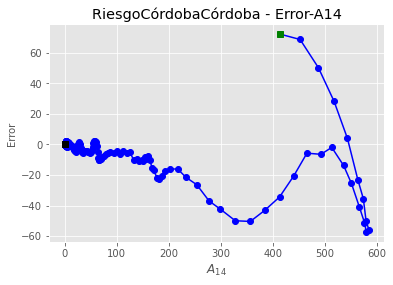

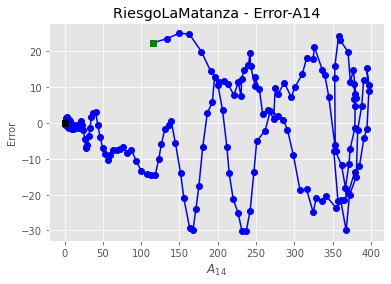

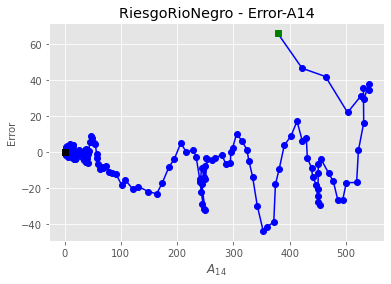

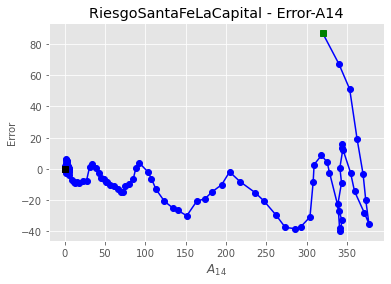

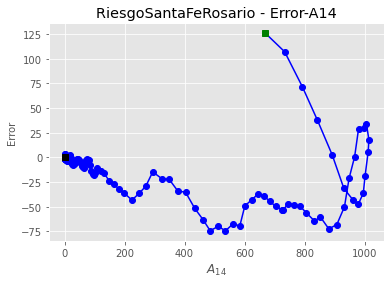

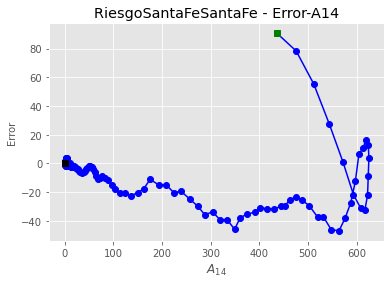

In [8]:
for file_name in files:
    print(file_name)
    Error_Analysis_A14(file_name)

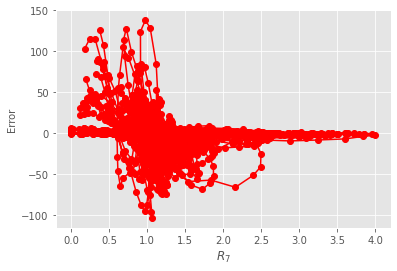

In [13]:
for file_name in files:
    Error_Analysis_R7_2(file_name) #this func to graph could be generalized from the other one
                                  #but idk i just made another one for this 
plt.savefig('Global_R7.pdf')

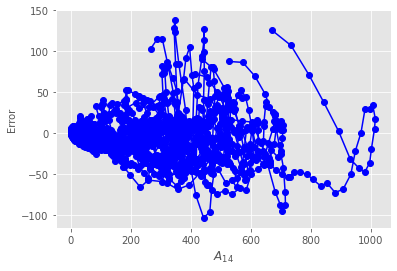

In [18]:
for file_name in files:
    Error_Analysis_A14_2(file_name) #same comment of the last one ofc
plt.savefig('Global_A14.pdf')